In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns
import scipy.stats
import scipy as sp

# Задача №1 (3б)

Пусткай у вас имеется датасет с описанием людей и меткой ' <=50K', которая показывает, получает ли человек (в США) более или менее 50к$ в год. Используя теорему Байеса покажите, что с ростом образования вероятность получать >50k в год растет.

Код загрузки данных и результирующая таблица предоставлены.

[Подсказка, теорема Байеса говорит нам, что

$$P( > или < 50k|класс-образования) = \frac{P(класс-образования | > или < 50k) * P(> или < 50k)}{P(наблюдать-этот-класс-образования)}$$


Для лаконичной агрегации данных в pandas встроена функция [group by](https://realpython.com/pandas-groupby/)
]

In [2]:
df_temp = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data')

In [3]:
df_temp.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
df_temp_2 = df_temp[[' Bachelors',' <=50K']]
df_temp_2.head()

,Bachelors,<=50K
0,Bachelors,<=50K
1,HS-grad,<=50K
2,11th,<=50K
3,Bachelors,<=50K
4,Masters,<=50K


In [5]:
df_counts_bachelors = pd.Series(df_temp_2[' Bachelors'].value_counts())
df_counts_bachelors

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name:  Bachelors, dtype: int64

In [6]:
df_temp_2[' <=50K'].value_counts()

 <=50K    24719
 >50K      7841
Name:  <=50K, dtype: int64

In [7]:
df_temp[' <=50K'].value_counts()/len(df_temp)

 <=50K    0.759183
 >50K     0.240817
Name:  <=50K, dtype: float64

Подсказка: см. мультииндекс и groupby

Да, код не иметь "красивое" решение

In [14]:
df_temp['edu']=df_temp[' <=50K']
df_temp_gr = df_temp.groupby([' Bachelors', ' <=50K'])[['39']]
df_final = df_temp_gr.count()
df_final['<=50K']=df_final['39']
df_final['Всего людей по классу образования']=df_final.groupby(level=0)['39'].transform('sum')# делает группировку (сумма) по первому уровню индекса
df_final['P(наблюдать этот класс образования)']=df_final['Всего людей по классу образования']/df_final['<=50K'].sum()
df_final['P(> или < 50k)']=df_final.groupby(level=1)['39'].transform('sum')/df_counts_bachelors.sum()
df_final['P(класс образования | > или < 50k']=df_final['<=50K']/df_final.groupby(level=1)['39'].transform('sum')
df_final['P(> или < 50K | класс образования)']=df_final['<=50K']/df_final['Всего людей по классу образования']
df_counts_bachelors.sum()
df_final.drop('39', axis=1, inplace=True)
df_final

<=50K  ...  P(> или < 50K | класс образования)
 Bachelors     <=50K         ...                                    
 10th          <=50K    871  ...                            0.933548
               >50K      62  ...                            0.066452
 11th          <=50K   1115  ...                            0.948936
               >50K      60  ...                            0.051064
 12th          <=50K    400  ...                            0.923788
               >50K      33  ...                            0.076212
 1st-4th       <=50K    162  ...                            0.964286
               >50K       6  ...                            0.035714
 5th-6th       <=50K    317  ...                            0.951952
               >50K      16  ...                            0.048048
 7th-8th       <=50K    606  ...                            0.938080
               >50K      40  ...                            0.061920
 9th           <=50K    487  ...                            0.947471
               >50K      27  ...                            0.052529
 Assoc-acdm    <=50K    802  ...                            0.751640
               >50K     265  ...                            0.248360
 Assoc-voc     <=50K   1021  ...                            0.738784
               >50K     361  ...                            0.261216
 Bachelors     <=50K   3133  ...                            0.585170
               >50K    2221  ...                            0.414830
 Doctorate     <=50K    107  ...                            0.259080
               >50K     306  ...                            0.740920
 HS-grad       <=50K   8826  ...                            0.840491
               >50K    1675  ...                            0.159509
 Masters       <=50K    764  ...                            0.443413
               >50K     959  ...                            0.556587
 Preschool     <=50K     51  ...                            1.000000
 Prof-school   <=50K    153  ...                            0.265625
               >50K     423  ...                            0.734375
 Some-college  <=50K   5904  ...                            0.809765
               >50K    1387  ...                            0.190235

[31 rows x 6 columns]

Из таблицы видно, что вероятность получать более 50 тыс $ в год растет с образованием. См. вероятности >50K у бакалавров, мастеров и докторов (0.414830, 0.556587, 0.740920)

# Задача 2 (2б)

Производитель спринклерных установок, используемых для противопожарной защиты офисных зданий, утверждает, что истинная средняя температура срабатывания системы составляет 130°. Выборка из n = 9 систем при тестировании дает среднюю температуру активации образца 131,08°F. Если распределение времени активации нормально при стандартном отклонении 1,5°F, противоречат ли данные утверждениям производителя на уровне значимости $\alpha = 0.01$?

В решении не использовать готовый функционал из stats. Следует расписать (тезисно основные шаги)

In [1]:
# Так как выборка у нас небольшая, соответственно будем использовать t-критерий Стьюдента по следующей формуле:
t = (131.08-130)/(1.5/(9)**0.5)
t


2.160000000000025

In [ ]:
# Число степеней свободы df равно 9-1 = 8
# По таблице критических значений Т-Стьюдента найдем кртитические значения при уровне значимости альфа = 0,01, степеней свободы 8
# По таблице значение равно 3,3554
# То есть вычисленный нами показатель t=2,1600 меньше чем критическое значение (3,3554)
#

Замечание: неравенство в Ха подразумевает, что тест является двусторонним, поэтому значение P является результатом удвоения захваченной площади хвоста:

P = 2[1 - Ф(z_stat)] = ...

0.03079999999999994

Вывод:

Утверждения производителя не противоречат полученным тестовм значениям


# Задача 3 (3б)

Динамический конический пенетрометр (ДКП) используется для измерения сопротивления материала проникновению, так как конус вбивается в дорожное покрытие или основание. Предположим, что для конкретного применения необходимо, чтобы истинное среднее значение ДКП для определенного типа покрытия было меньше 30. Это покрытие не будет использоваться до тех пор, пока не будет убедительно доказано, что технические условия были соблюдены. Проверить соответствующие гипотезы, используя следующие данные: 

In [10]:
arr = [14.1, 14.5, 15.5, 16.0, 16.0, 16.7, 16.9, 17.1, 17.5, 17.8, 17.8, 18.1, 18.2, 18.3, 18.3, 19.0, 19.2, 19.4, 20.0, 20.0, 20.8, 20.8, 21.0, 21.5, 23.5, 27.5, 27.5, 28.0, 28.3, 30.0, 30.0, 31.6, 31.7, 31.7, 32.5, 33.5, 33.9, 35.0, 35.0, 35.0, 36.7, 40.0, 40.0, 41.3, 41.7, 47.5, 50.0, 51.0, 51.8, 54.4, 55.0, 57.0]

Визуализировать данные с помощью описательных статистик (см. вывод ниже) и построить .95 доверительные интервалы для $\mu, \sigma, Median$

Ваши рассуждения: с помощью инструментов библиотеки seaborn визуально покажем описательные статистики для списка arr

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, '')]

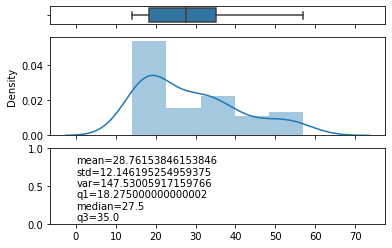

In [5]:
f, (ax_box, ax_displot, ax_text) = plt.subplots(3, sharex=True, gridspec_kw={"height_ratios": (.15, .85, .65)})#разделяет окно на три части

sns.boxplot(arr, ax=ax_box)# добавляем  в каждое окно по графику
sns.distplot(arr, kde=True, hist=True, ax=ax_displot)
plt.text(0.1, 0.8, 'mean='+str(np.mean(arr)))
plt.text(0.1, 0.65, 'std='+str(np.std(arr)))
plt.text(0.1, 0.5, 'var='+str(np.var(arr)))
plt.text(0.1, 0.35, 'q1='+str(np.quantile(arr, .25)))
plt.text(0.1, 0.2, 'median='+str(np.median(arr)))
plt.text(0.1, 0.05, 'q3='+str(np.quantile(arr, .75)))
  
ax_box.set(xlabel='') #удаление оси х в боксплоте

In [37]:
# Доверительные интервалы для среднего 
#(при 0,95 доверительном интервале по таблице нормального распределения 1,96 стандартных отклонений)
# вычисляются следующим образом
arr_2 = [np.mean(arr)-1.96*np.std(arr)/(len(arr))**0.5, np.mean(arr)+1.96*np.std(arr)/(len(arr))**0.5]
arr_2

[25.460164984793664, 32.06291193828326]

In [94]:
# доверительные интервалы медианы
#По таблице значений К определяем границы двустороннего доверительного интервала (доверие 0,95) при объеме выборки менее 100
#K=19
#В нашем списке 19-й и 20-й элемент равны ( то есть это границы нашего доверительного интервала для медианы)
print (sorted(arr)[18], sorted(arr)[19])


20.0 20.0


In [33]:
# проверим, насколько среднее значение выборки отличается от среднего значения к истинному значению генеральной совокупности
# построим генеральную совокупность, к примеру, из 200 элементов (считаем что совокупность нормально распределена)

arr_gen = []  

for x in range(200):
    sample = np.random.choice(a= arr, size=500)
    arr_gen.append( sample.mean() )
arr_gen_mean = np.array(point_estimates).mean()
arr_gen_mean


28.756684

In [34]:
# Теперь оценим отличие
np.mean(arr)-arr_gen_mean

0.004854461538460697

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5, 0, '')]

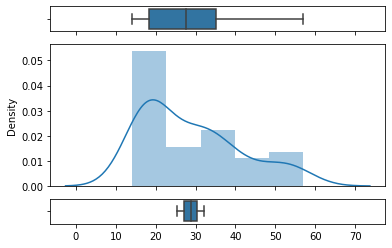

In [59]:
f, (ax_box, ax_displot, ax_interval) = plt.subplots(3, sharex=True, gridspec_kw={"height_ratios": (.15, .85, .15)})

sns.boxplot(arr, ax=ax_box)
sns.distplot(arr, kde=True, hist=True, ax=ax_displot)
sns.boxplot(arr_2, ax=ax_interval)

ax_box.set(xlabel='') #удаление оси х в боксплоте


Ваш вывод: учитывая то, что при установленном уровне доверия среднее значение выборки находится на достаточно близком расстоянии от нормального среднего значения, требуемое значение находится в пределах доверительного интервала можно сделать вывод что дорожное покрытие соответствует техническим условиям


# Задача 4 (2б)


Обширный мониторинг компьютерной системы совместного использования времени показал, что время отклика на конкретную команду редактирования, как правило, распределяется со стандартным отклонением 25 миллисекунд. Была установлена новая операционная система, и мы хотим оценить истинное среднее время отклика $\mu$ для новой среды. Если предположить, что время отклика все еще нормально распределено с $\sigma = $ 25, то какой размер выборки необходим для того, чтобы получившийся 95% доверительный интервал имел ширину (максимум) 10?

Ваши рассуждения

Известно, что доверительным интервалом будет называется интервал, в который с заданной точностью будут попадаться наши наблюдения. Из формулы следует, что границы интервала равны среднему значению плюс минус погрешность измерения. То есть, ширина доверительного интервала соответствует двум погрешностям измерения. В нашем случае погрешность будет равна 10/2 = 5.
Также известно, что погрешность изверения равна z стандартного нормального измерения, умноженное на квадратный корень из деления квадрата среднеквадратического отклонения (дисперсии) на количество наблюдений.
E = z*(sigma**2/n)*1/2
Если из этой формулы выведем количество наблюдений, то получим формулу:
n=(z*sigma/E)**2
Из условий  уровень доверия у нас 95% или 0,95, что по таблице нормального распределения соответствует z=1,96
Ширина доверительного интервала равна двум погрешностям или равна 5
Sigma = 25.
Подставляем значения в формулу и получаем:    

In [64]:
a = (1.96*25/5)**2
a

96.04000000000002

Ваш вывод: для того, чтобы наши наблюдения "ложились" в доверительный интервал, равный 10, необходима выборка из 96 наблюдений.

# Задача на бонусный балл

Предположим мы сместили центр масс монеты таким образом, что выпадает она в 65% случаев решкой. Сколько подбрасываний нужно при заданном уровне значимости, чтобы определить, что она фальшивая? (ну т.е. не 50/50 вероятности орел/решка)

Ваши рассуждения